In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from skimage.feature import hog
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn import svm
from skimage import exposure

**Dataset Preparation**

In [6]:
train_df = pd.read_csv('emnist-letters-train.csv')
train_df

,23,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88794,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88795,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88796,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88797,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test_df = pd.read_csv('emnist-letters-test.csv')
test_df

,1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.548,0.549,0.550,0.551,0.552,0.553,0.554,0.555,0.556,0.557
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14794,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14795,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14796,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14797,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
train_df = pd.read_csv('emnist-letters-train.csv', header=None)
train_df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88795,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88796,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88797,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88798,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
test_df = pd.read_csv('emnist-letters-test.csv', header=None)
test_df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14795,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14796,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14797,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14798,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")

Train shape: (88800, 785)
Test shape: (14800, 785)


In [11]:
# Ambil 100 sampel per kelas (total 2600 data) ---
marge_df = pd.concat([train_df, test_df])

samples_per_class = 100

balanced_df = pd.concat([
    marge_df[marge_df[0] == class_id].sample(samples_per_class, random_state=42)
    for class_id in range(1,27)
])

print(balanced_df)

       0    1    2    3    4    5    6    7    8    9    ...  775  776  777  \
2533     1    0    0    0    0    0    0    0    0    0  ...    0    0    0   
63465    1    0    0    0    0    0    0    0    0    0  ...    0    0    0   
14972    1    0    0    0    0    0    0    0    0    0  ...    0    0    0   
88265    1    0    0    0    0    0    0    0    0    0  ...    0    0    0   
78382    1    0    0    0    0    0    0    0    0    0  ...    0    0    0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
5583    26    0    0    0    0    0    0    0    0    0  ...    0    0    0   
33927   26    0    0    0    0    0    0    0    0    0  ...    0    0    0   
88423   26    0    0    0    0    0    0    0    0    0  ...    0    0    0   
16008   26    0    0    0    0    0    0    0    0    0  ...    0    0    0   
30594   26    0    0    0    0    0    0    0    0    0  ...    0    0    0   

       778  779  780  781  782  783  784  
2533    

In [13]:
labels = train_df.iloc[:, 0].values
images = train_df.iloc[:, 1:].values

In [14]:
target_labels = [2, 3, 4]
selected_indices = []

In [15]:
labels_balanced = balanced_df.iloc[:, 0].values  # misalnya label ada di kolom pertama dataframe

In [16]:
for label in target_labels:
    idx = np.where(labels_balanced == label)[0][0]  # ambil satu contoh pertama
    selected_indices.append(idx)

In [17]:
images_balanced = balanced_df.iloc[:, 1:].values  # ambil semua kolom kecuali label sebagai gambar
labels_balanced = balanced_df.iloc[:, 0].values  # ambil kolom label

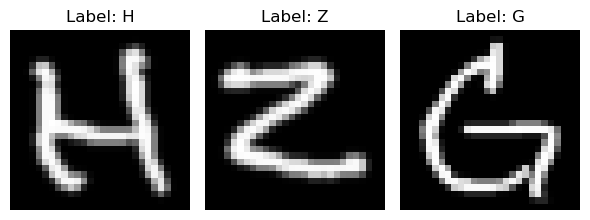

In [21]:
plt.figure(figsize=(6, 3))
for i in range(len(selected_indices)):
    random_idx = random.randint(0, len(images_balanced) - 1)
    image_flat = images_balanced[random_idx]
    image_reshaped = image_flat.reshape(28, 28).T  # Bentuk ulang dan transpose
    label_char = chr(labels_balanced[random_idx] + 64)  # Label sesuai gambar yang dipilih
    
    plt.subplot(1, len(selected_indices), i + 1)
    plt.imshow(image_reshaped, cmap='gray')
    plt.title(f"Label: {label_char}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [22]:
df_shuffled = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [23]:
X = df_shuffled.iloc[:, 1:].values  # pixel values
y = df_shuffled.iloc[:, 0].values  # labels

In [24]:
# Split 80% train, 20% test ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Verifikasi hasil
print("Ukuran Data Pelatihan:", X_train.shape)  # (2080, 784)
print("Ukuran Data Pengujian:", X_test.shape)    # (520, 784)

Ukuran Data Pelatihan: (2080, 784)
Ukuran Data Pengujian: (520, 784)


**Feature Extraction Using HOG**

In [25]:
def extract_hog_features(images, orientations=9, pixels_per_cell=(4, 4), cells_per_block=(2, 2)):
    hog_features = []
    for img in images:
        # Ubah vektor 784 ke gambar 28x28
        img_reshaped = img.reshape((28, 28))

        # Ekstrak fitur HOG
        features = hog(img_reshaped,
                       orientations=orientations,
                       pixels_per_cell=pixels_per_cell,
                       cells_per_block=cells_per_block,
                       block_norm='L2-Hys',
                       transform_sqrt=True,
                       feature_vector=True)
        hog_features.append(features)
    
    return np.array(hog_features)

In [26]:
# Ekstrak fitur HOG untuk data latih dan data uji
X_train_hog = extract_hog_features(X_train)
X_test_hog = extract_hog_features(X_test)

# Lihat bentuk hasil fitur HOG
print("HOG feature shape (train):", X_train_hog.shape)
print("HOG feature shape (test):", X_test_hog.shape)

HOG feature shape (train): (2080, 1296)
HOG feature shape (test): (520, 1296)


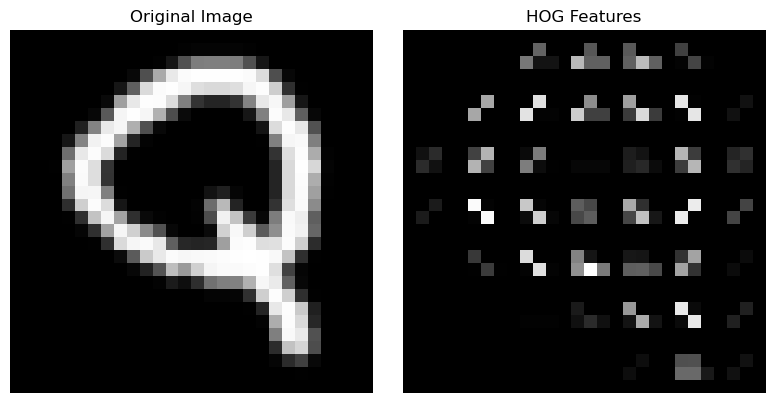

In [27]:
# Ambil satu gambar dari X_train
image = X_train[50].reshape((28, 28))

# Ekstrak dan tampilkan citra HOG
fd, hog_image = hog(image,
                    orientations=9,
                    pixels_per_cell=(4, 4),
                    cells_per_block=(2, 2),
                    block_norm='L2-Hys',
                    transform_sqrt=True,
                    visualize=True)

# Plot gambar asli dan HOG
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(hog_image, cmap='gray')
plt.title("HOG Features")
plt.axis('off')

plt.tight_layout()
plt.show()

**Classification**

In [28]:
# Grid parameter SVM
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}

In [29]:
model = svm.SVC()

In [30]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, 
                    cv=3, verbose=2, n_jobs=-1)

In [31]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 0.01, 0.001],
                         'kernel': ['linear', 'rbf']},
             verbose=2)

**Evaluation**

In [32]:
y_pred = grid.predict(X_test)

In [33]:
print("Best Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           1       0.68      0.65      0.67        20
           2       0.78      0.70      0.74        20
           3       0.69      0.90      0.78        20
           4       0.70      0.70      0.70        20
           5       0.94      0.80      0.86        20
           6       0.74      0.85      0.79        20
           7       0.50      0.65      0.57        20
           8       0.84      0.80      0.82        20
           9       0.56      0.70      0.62        20
          10       0.80      0.80      0.80        20
          11       0.88      0.70      0.78        20
          12       0.45      0.50      0.48        20
          13       0.90      0.90      0.90        20
          14       0.70      0.70      0.70        20
          15       0.87      1.00      0.93        20
          16       0.88      0.75  

In [34]:
print("=== Evaluation on stet ===")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision :", precision_score(y_test, y_pred, average='macro'))
print("Recall :", recall_score(y_test, y_pred, average='macro'))
print("F1-Score :", f1_score(y_test, y_pred, average='macro'))

=== Evaluation on stet ===
Accuracy : 0.75
Precision : 0.7614874439987305
Recall : 0.7499999999999999
F1-Score : 0.7515617369709381


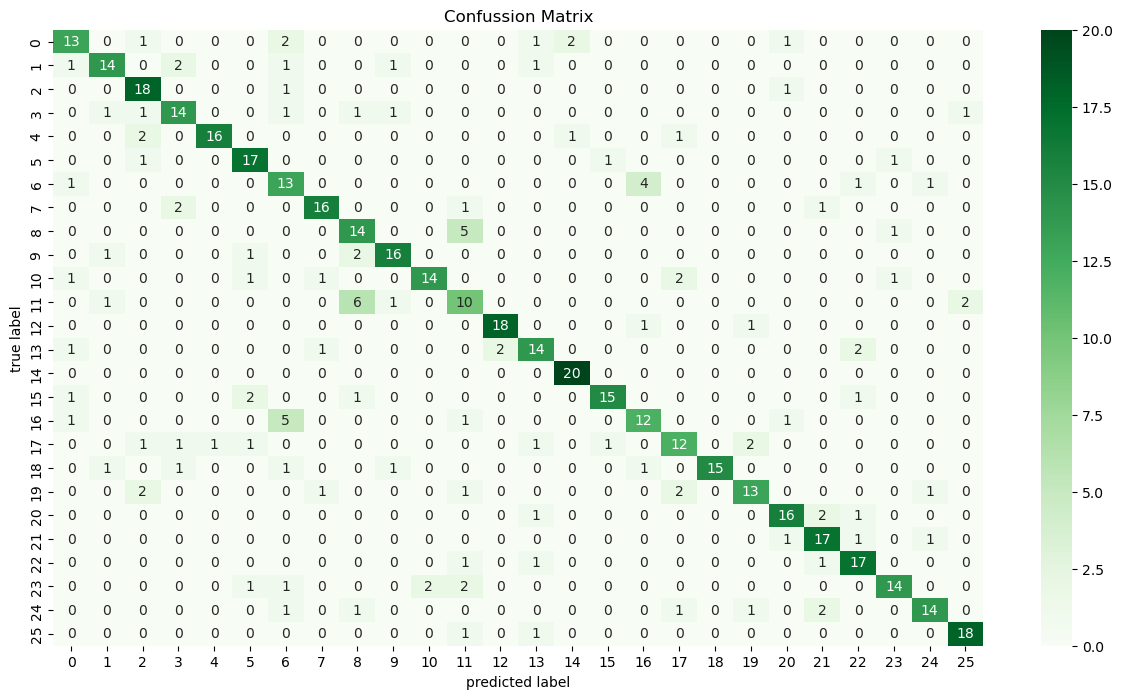

In [35]:
#menampilkan Confusion Matrix dari prediksi Model 

conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Greens')
plt.title("Confussion Matrix")
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.show()